# DSCI 303 - Project 04

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis

The data will be loaded into a DataFrame and the structure of the dataset will be explored.

In [2]:
diamonds = pd.read_table('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


The size of the dataset will now be determined.

In [3]:
diamonds.shape

(53940, 10)

The distribution of the columns in the diamonds dataset will be inspected.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting

This part will begin by viewing the information about the 5 most expensive diamonds in the dataset.

In [5]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].\
                sort_values(by = 'price', ascending = False).\
                head(10)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1
27745,18797,2.29,Premium,I,SI1
27743,18795,2.04,Premium,H,SI1
27744,18795,2.00,Premium,I,VS1
27741,18791,1.71,Premium,F,VS2
27742,18791,2.15,Ideal,G,SI2


The information about the 5 least expensive diamonds will now be viewed.

In [6]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].\
                sort_values(by = 'price').\
                head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


Information from the dataset about the 5 largest diamonds with an ideal cut will now be shown.

In [7]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].\
                loc[diamonds["cut"] == 'Ideal'].\
                sort_values(by = 'carat', ascending = False).\
                head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


Information from the dataset about the 5 largest diamonds with a fair cut will now be shown.

In [8]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].\
                loc[diamonds["cut"] == 'Fair'].\
                sort_values(by = 'carat', ascending = False).\
                head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables

Lists will now be created that specificy the order of the categorical variables of cut, color and clarity.

In [9]:
clarity_levels = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
cut_levels = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_levels = ["J", "I", "H", "G", "F", "E", "D"]

The created lists above (which contain the levels from worst to best) will now be utilized to communicte to Pandas the correct order for the levels of the categorical variables.

In [10]:
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)

Lists of names colors will be created in the following, and will serve as palettes to be used for plotting and visualizations later in this project.

In [11]:
clarity_pal = ['Crimson', 'HotPink', 'Coral', 'Khaki', 'DarkSeaGreen', 'Aquamarine', 'DeepSkyBlue', 'Plum']
color_pal = ['Salmon', 'LightPink', 'Gold', 'PaleGreen', 'LightBlue']
cut_pal = ['Red', 'Orange', 'Gold', 'LawnGreen', 'Cyan', 'BlueViolet', 'Magenta']


## Part 4: Displaying Counts for Categorical Variables

The following will first display the number of diamonds for each level of cut.

In [12]:
diamonds.cut.value_counts().sort_index()

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

The counts for each level of color will now be displayed.

In [13]:
diamonds.color.value_counts().sort_index()

J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: color, dtype: int64

Finally, the counts for a each level of clarity will now be displayed.

In [14]:
diamonds.clarity.value_counts().sort_index()

I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: clarity, dtype: int64

## Part 5: Scatterplots of Price Against Carat

The relationship between price and carat from the diamond dataset will be displayed visually using scatterplots.

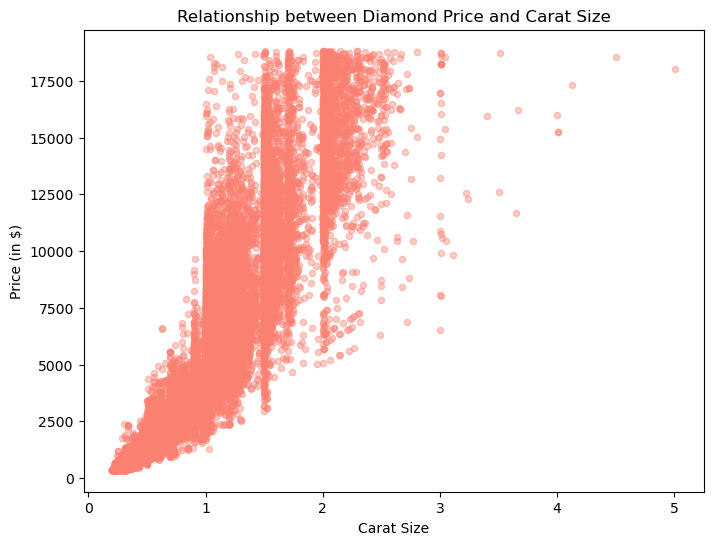

In [15]:
plt.figure(figsize = [8, 6])

plt.scatter(x = diamonds.loc[:, 'carat'], y = diamonds.loc[:, 'price'], s = 20, alpha = 0.4, 
            color = 'Salmon')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()

Using the plot above, the points will now be colored according to clarity.

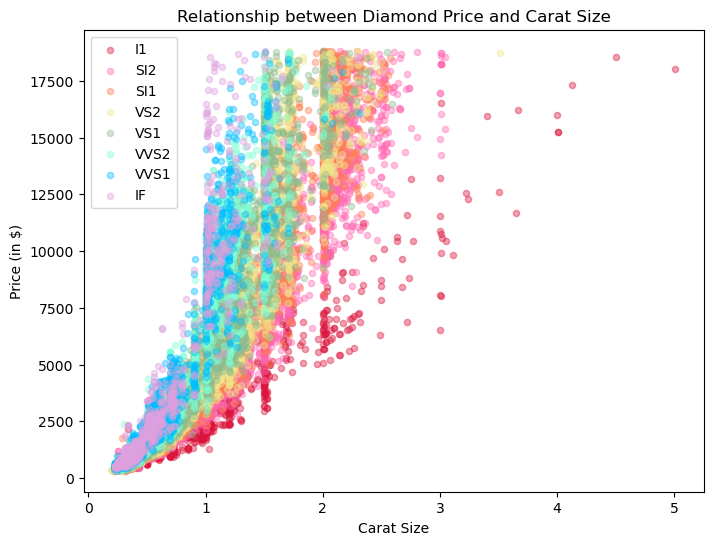

In [16]:
plt.figure(figsize = [8, 6])

for i in range(0, 8):
    plt.scatter(x = diamonds['carat'][diamonds.clarity == clarity_levels[i]], y = diamonds.loc[:, 'price'][diamonds.clarity == clarity_levels[i]], s = 20, 
                alpha = 0.4, color = clarity_pal[i], label = clarity_levels[i])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title('Relationship between Diamond Price and Carat Size')
plt.legend()
plt.show()

Each of the eight clarity levels will now be separated into it's own subplot.

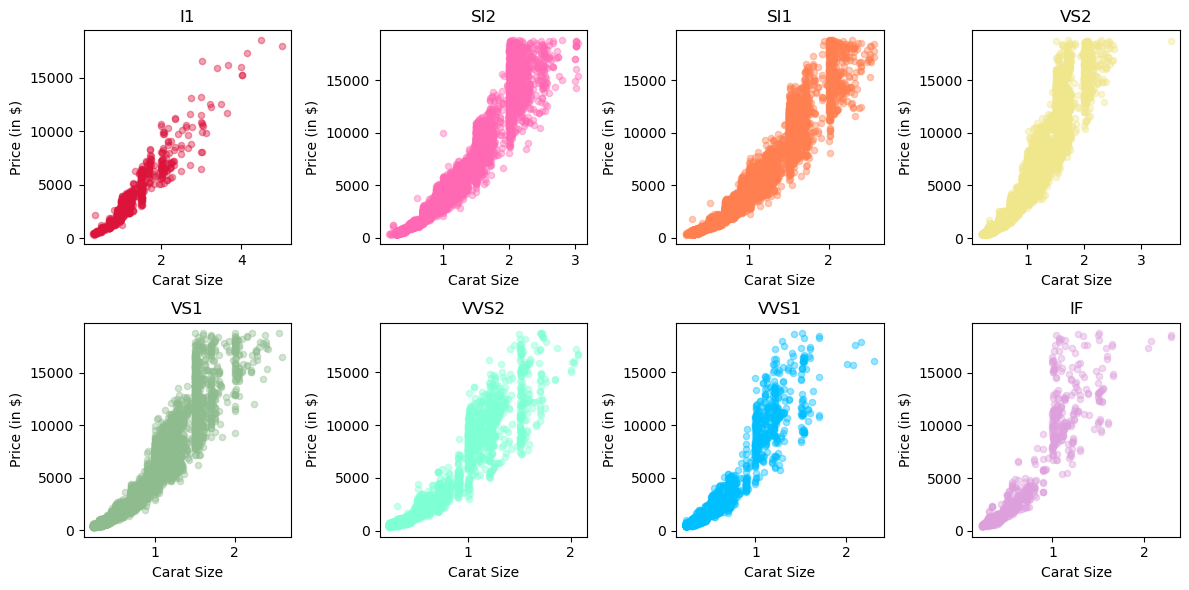

In [17]:
plt.figure(figsize = [12, 6])

for i in range(0, 8):
    
    plt.subplot(2, 4, i + 1)

    plt.scatter(x = diamonds['carat'][diamonds.clarity == clarity_levels[i]],
                y = diamonds.loc[:, 'price'][diamonds.clarity == clarity_levels[i]], s = 20, alpha = 0.4, color = clarity_pal[i])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title(clarity_levels[i])
plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations

Two new columns will be added to the diamonds dataset containing logarithmic transformations to the price and carat columns.

In [18]:
diamonds.loc[:, 'ln_carat'] = np.log(diamonds['carat'])
diamonds.loc[:, 'ln_price'] = np.log(diamonds['price'])

Histograms will be utilized in the following portion to explore the distribution and log of the diamond prices.

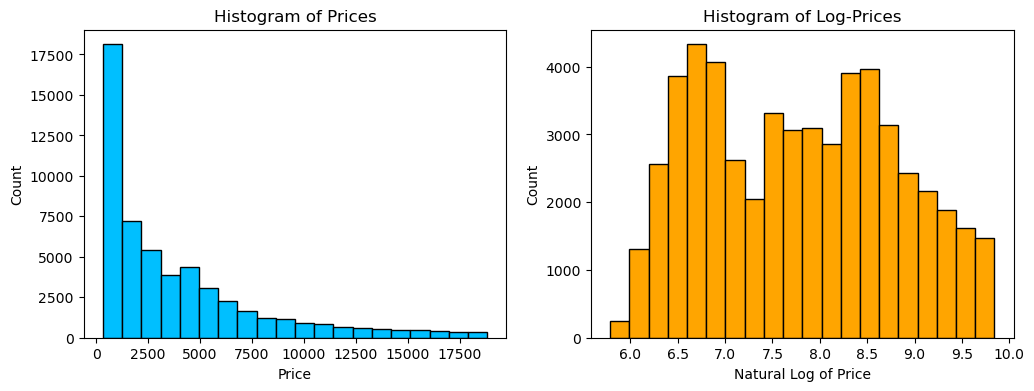

In [19]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.hist(diamonds.loc[:, 'price'], edgecolor = 'black', color = 'DeepSkyBlue', 
         bins = 20)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(diamonds.loc[:, 'ln_price'], edgecolor = 'black', color = 'Orange', 
         bins = 20)
plt.title('Histogram of Log-Prices')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.show()

Histograms will now be used to visualize and explore and the distribution and log of carat sizes.

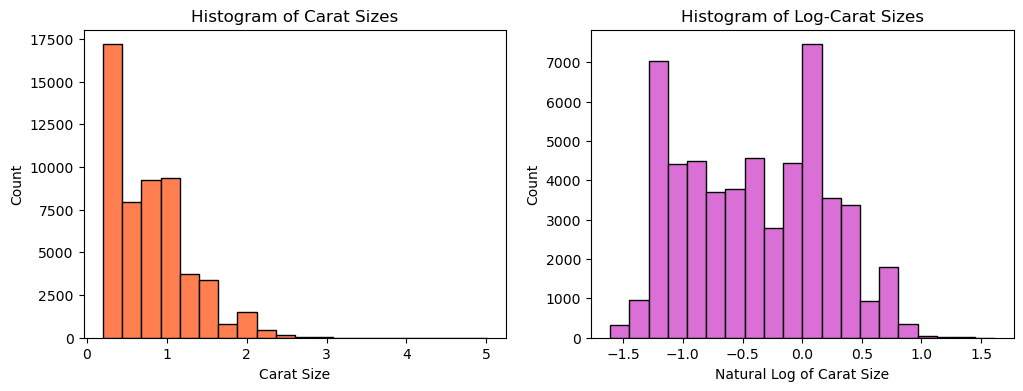

In [20]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.hist(diamonds.loc[:, 'carat'], edgecolor = 'black', color = 'Coral', 
         bins = 20)
plt.title('Histogram of Carat Sizes')
plt.xlabel('Carat Size')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(diamonds.loc[:, 'ln_carat'], edgecolor = 'black', color = 'Orchid', 
         bins = 20)
plt.title('Histogram of Log-Carat Sizes')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.show()

## Part 7: Scatterplot of Transformed Variables

A scatterplot of ln_price will be plotted against ln_carat, with their points being color coded according to clarity.

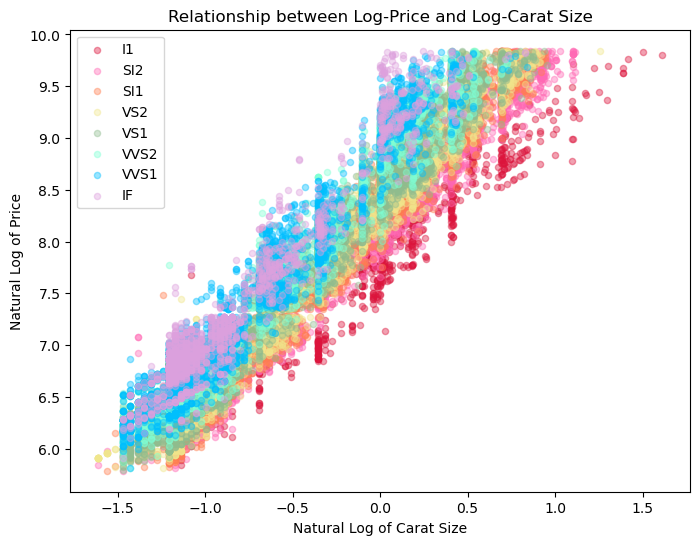

In [21]:
plt.figure(figsize = [8, 6])

for i in range(0, 8):
    plt.scatter(x = diamonds['ln_carat'][diamonds.clarity == clarity_levels[i]], y = diamonds.loc[:, 'ln_price'][diamonds.clarity == clarity_levels[i]], s = 20, 
                alpha = 0.4, color = clarity_pal[i], label = clarity_levels[i])
    plt.xlabel('Natural Log of Carat Size')
    plt.ylabel('Natural Log of Price')
    plt.title('Relationship between Log-Price and Log-Carat Size')
plt.legend()
plt.show()

## Part 8: Grouping by Cut

The following will create a grouped DataFrame displaying the mean price and carat size for each cut level.

In [22]:
gb_cut =\
    diamonds.loc[:, ['cut', 'price', 'carat']].\
    groupby(['cut']).mean()

gb_cut

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


Bar charts will now be utilized to display the information from the DataFrame above in a visual format.

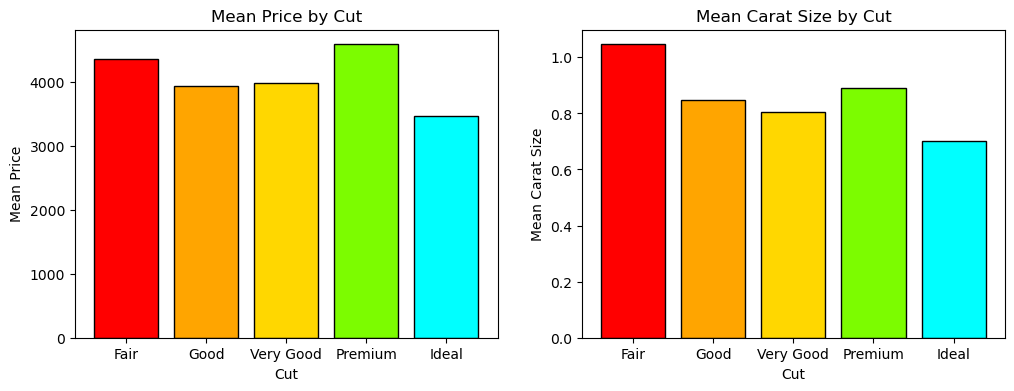

In [23]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.bar(x = cut_levels, height = gb_cut.loc[:, 'price'], color = cut_pal, edgecolor= 'black')
plt.title('Mean Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(x = cut_levels, height = gb_cut.loc[:, 'carat'], color = cut_pal, edgecolor= 'black')
plt.title('Mean Carat Size by Cut')
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.show()

## Part 9: Grouping by Color

A grouped DataFrame will be created displaying the mean price and carat size for each color level.

In [24]:
gb_color =\
    diamonds.loc[:, ['color', 'price', 'carat']].\
    groupby(['color']).mean()
gb_color

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


Bar charts will now be utilized to graphically display the information gained from the above DataFrame.

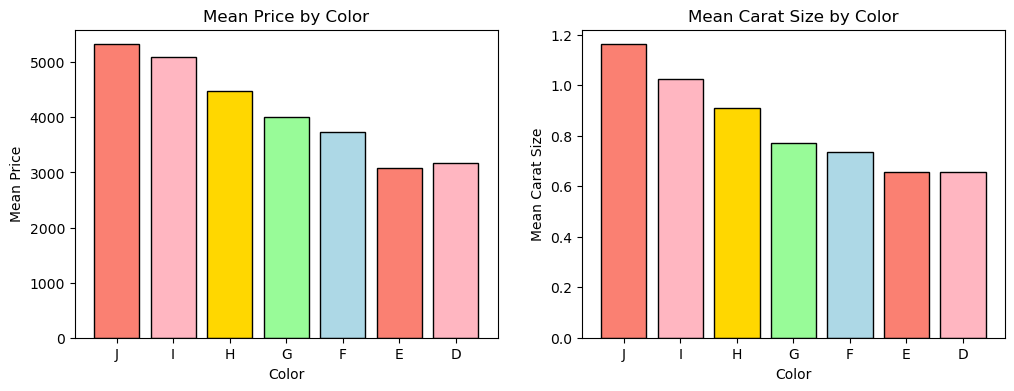

In [25]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.bar(x = color_levels, height = gb_color.loc[:, 'price'], color = color_pal, edgecolor= 'black')
plt.title('Mean Price by Color')
plt.xlabel('Color')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(x = color_levels, height = gb_color.loc[:, 'carat'], color = color_pal, edgecolor= 'black')
plt.title('Mean Carat Size by Color')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.show()

## Part 10: Grouping by Clarity

The following wil calculate a grouped DataFame containing the mean price and carat size for each level of clarity.

In [26]:
gb_clarity = \
    diamonds.loc[:, ['clarity', 'price', 'carat']].\
    groupby(['clarity']).mean()
gb_clarity

,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


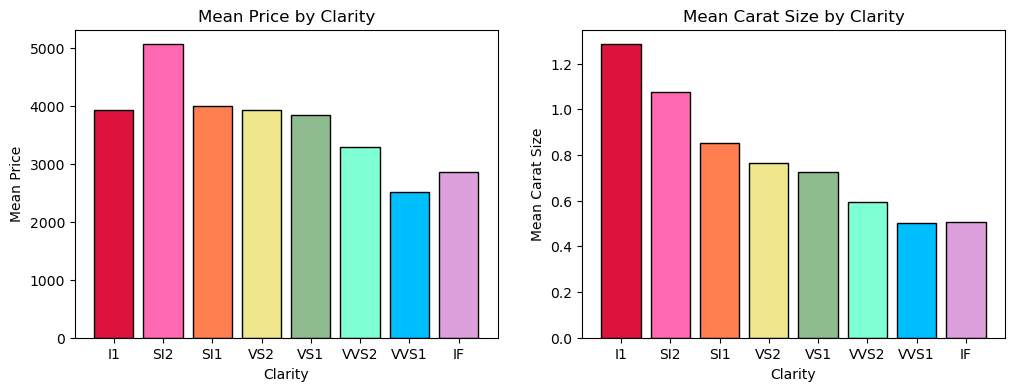

In [27]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.bar(x = clarity_levels, height = gb_clarity.loc[:, 'price'], color = clarity_pal, edgecolor= 'black')
plt.title('Mean Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(x = clarity_levels, height = gb_clarity.loc[:, 'carat'], color = clarity_pal, edgecolor= 'black')
plt.title('Mean Carat Size by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')
plt.show()